# Question - 2

In [42]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d
import matplotlib.axes as axes

### Generating The datasets

In [43]:
def rosenborck_function(x, y):
    return x**2 + 100*((y-x**2)**2)

def generate_points(n, t):
    '''
    We shall use this function to generate the points with random initialisation 
    as mentioned in the question. We shall take the points from the range ...
    [-10, 10]^2
    x is the 1st argument
    y is the 2nd argument
    '''
    training_set_x = []
    training_set_y = []
    for i in range(n):
        training_set_x += [[random.uniform(-t, t), random.uniform(-t, t)]]
        training_set_y += [rosenborck_function(training_set_x[i][0], training_set_x[i][1])]
    training_set_y = np.array(training_set_y)
    training_set_x = np.array(training_set_x)
    return training_set_x, training_set_y
data_points = 500
t = 1
training_set_x, training_set_y = generate_points(data_points, t)

In [44]:
pd.DataFrame(training_set_y)

,0
0,47.990667
1,61.149946
2,201.249719
3,36.517035
4,0.207662
...,...
495,149.022444
496,8.430638
497,14.045944
498,1.741361


In [45]:
pd.DataFrame(training_set_x)

,0,1
0,-0.005481,-0.692723
1,-0.241415,0.839893
2,-0.779490,-0.808877
3,0.751533,-0.034800
4,0.412330,0.189419
...,...,...
495,-0.593221,-0.867394
496,-0.881431,0.500268
497,-0.194735,0.412195
498,0.655905,0.544717


In [46]:
def plot_points(training_set_x, training_set_y):
    # fig = plot.figure()
    # ax = plot.axes(projection = '3d', )
    # ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color = 'black')
    z = []
    for i in range(len(training_set_x)):
        for j in range(len(training_set_x)):
            temp_dict = dict()
            temp_dict['x'] = training_set_x[i][0]
            temp_dict['y'] = training_set_x[j][1]
            temp_dict['function'] = rosenborck_function(training_set_x[i][0], training_set_x[j][1])
            z += [temp_dict]
    return z
temp = pd.DataFrame(plot_points(training_set_x, training_set_y))
temp

,x,y,function
0,-0.005481,-0.692723,47.990667
1,-0.005481,0.839893,70.536932
2,-0.005481,-0.808877,65.433091
3,-0.005481,-0.034800,0.121346
4,-0.005481,0.189419,3.586840
...,...,...,...
249995,-0.115249,-0.867394,77.572273
249996,-0.115249,0.500268,23.728741
249997,-0.115249,0.412195,15.926398
249998,-0.115249,0.544717,28.255591


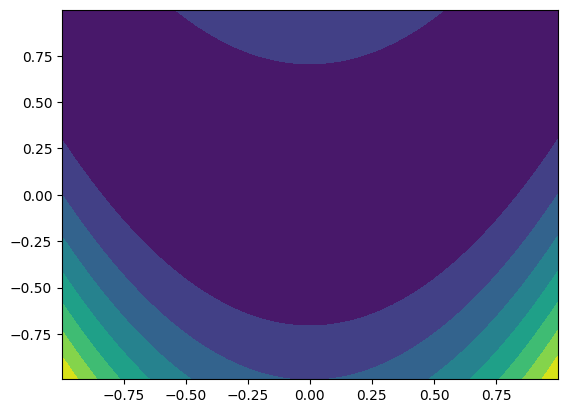

In [47]:
fig = plot.figure()
ax = plot.axes(projection='3d',)
ax.scatter3D(list(temp['x']), list(temp['y']), list(temp['function']))
# plot.savefig('./data.png')
plot.show()

In [48]:
def gradient_value(parameters):
    x = parameters[0]
    y = parameters[1]
    # print(parameters)
    return np.array([2*x - 400*x*(y - x**2), 200*(y - x**2)]).astype(np.float64)
def gradient_descent(w_now, data_points, learning_rate, tolerence):
    # print(w_now)
    gradient = gradient_value(w_now)
    print(w_now)
    # w_new = np.array([0.0]*len(w_now))
    # loss = sum([rosenborck_function(i[0], i[1]) for i in x/_set])/data_points
    for i in range(len(gradient)):
        gradient[i] *= learning_rate
    w_new = w_now - gradient
    loss = rosenborck_function(w_new[0], w_new[1])
    if(loss < tolerence):
        # print("Epochs: ", epochs)
        print("Loss: ", loss)
        return w_new, 0
        # it means that we don't have to continue 
    return w_new, 1





In [49]:
w_init = np.array([10, 100])
epochs = 100000
learning_rate = 0.00005
tolerence = 0.001
w_new, cont = gradient_descent(w_init, data_points ,learning_rate, tolerence)
for i in range(epochs):
    w_new, cont = gradient_descent(w_new, data_points, learning_rate, tolerence)
    # print(w_new)
    if(not cont):
        break

# print(w_new)

[ 10 100]
[  9.999 100.   ]
[10.0019995  99.99980001]
[  9.9929589  100.00020195]
[10.02013464 99.99879221]
[  9.93810861 100.00283527]
[10.18295031 99.99046694]
[  9.42798432 100.02748704]
[11.52770933 99.91608105]
[  3.92472361 100.24580107]
[10.58398629 99.39737761]
[ 7.91081256 99.52361149]
[13.75495004 99.15418493]
[-11.01756799 100.05462959]
[ -6.31589251 100.26795133]
[-13.942011   99.6641768]
[ 12.4698724  100.61133174]
[ -1.21989918 101.1601956 ]
[ -3.65157404 100.16347519]
[-9.99249454 99.29518037]
[-9.88062521 99.30072803]
[-10.21043523  99.2839883 ]
[-9.19470129 99.33367829]
[-11.9137853   99.18576683]
[-1.72570861 99.61329196]
[-5.06082071 98.64693974]
[-12.45265883  97.91658941]
[ 1.78250412 98.48811063]
[ 5.18016339 97.53500274]
[12.50449068 96.82799364]
[-2.38568017 97.42333657]
[-6.76229951 96.50601791]
[-13.62905264  95.99824467]
[10.8372315  96.89577299]
[ 6.38208604 97.10127112]
[13.5766434  96.53756863]
[-10.26195411  97.41544541]
[-8.64112839 97.49436798]
[-12.584

In [50]:
print(w_new)

[-6.69191681 44.7867228 ]
